<a href="https://colab.research.google.com/github/d3f4u1t0/SimulacionCohete/blob/main/Copy_of_cohete_simulacion_inicial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0, 0.5, 'Fuerza de propulsión respecto al tiempo')

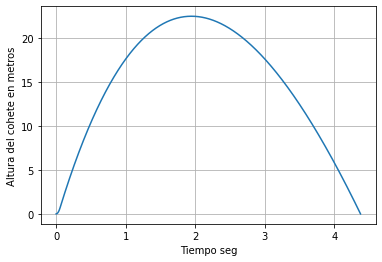

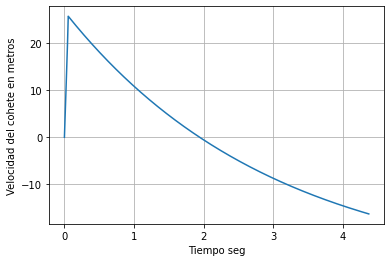

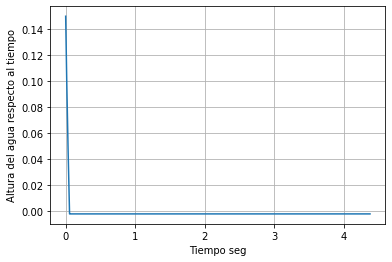

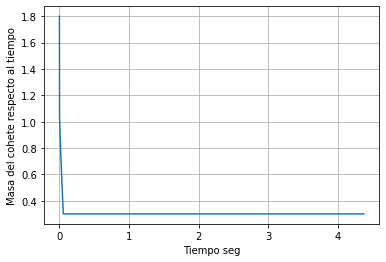

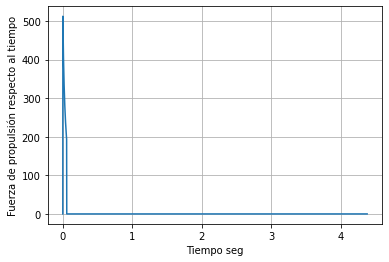

In [17]:
import numpy as np
import matplotlib.pyplot as plt

#Parametros de la simulación
Mo=1.5   #peso de la botella con 1.5lt de agua
mo=0.3   #Peso de la botella vacía, 300gr
Kv=0.1   #Constante de fricción
g=9.8    #Aceleración de la gravedad
dt=0.001 #Cambio en el tiempo
Ht=0.3   #Altura del tanque
At=0.005 #Area del tanque
Ao=0.00062 #Area del orificio
Pa=101325 #Presión atmosferica
Nat=5 #Numero de atmosferas para el calculo de Psi
Rho=1000 #Densidad del agua



#Variables de la simulación
yo=0 #Altura inicial del cohete
y1=0 #Velocidad inicial del cohete
ht=0.15 #Altura inicial del agua
mt=Mo+mo #Masa total del cohete
t=0 #Tiempo inicial
Fp=0 #Fuerza de propulsión inicial

Psi=Nat*Pa*At*ht  #Presión del tanque

#Declaración de listas para generar las graficas
vYo=[yo]
vY1=[y1]
vHT=[ht]
vMt=[mt]
vFp=[Fp]
vT=[t]

while(yo>=0): #Vamos a correr la simulación hasta que caiga nuevamente
  #Cálculo de las velocidades
  dyodt=y1
  dhdt=-((Pa-(Rho*g*ht)-(Psi/((Ht-ht)*At)))/((1/2)*(Rho*(1-(At/Ao)**2))))**(1/2) #Calculo de la razón de cambio de la altura del agua
  if(ht>=0): #Se calculan las variables que dependen de ht mientras aún haya agua dentro del cohete
      Fp=Rho*(At**2/Ao)*dhdt**2 #Calculo de la fuerza de propulsión relacionado a la nueva altura del agua
      mt=mo+(At*ht*Rho) #Calculo de la masa actual del cohete
      dy1dt=-Kv*y1/mt+Fp/mt-g #Calculo de la velocidad del cohete
  else: #Si no estas variables toman un valor diferente mientras se acaba la simulación
    Fp=0
    ht=0
    mt=mo
    dy1dt=-Kv*y1/mo-g
  #Cálculo de las nuevas posiciones
  yo=yo+dt*dyodt
  y1=y1+dt*dy1dt
  ht=ht+dt*dhdt
  t=t+dt

  #Se agregan los valores calculados a la lista para poder graficar
  vYo.append(yo)
  vY1.append(y1)
  vHT.append(ht)
  vMt.append(mt)
  vFp.append(Fp)
  vT.append(t)

#Grafica de la altura del cohete
plt.plot(vT, vYo)
plt.grid()
plt.xlabel('Tiempo seg')
plt.ylabel('Altura del cohete en metros')

#Grafica de la velocidad del cohete
plt.figure()
plt.plot(vT, vY1)
plt.grid()
plt.xlabel('Tiempo seg')
plt.ylabel('Velocidad del cohete en metros')

#Grafica de la altura del agua del cohete
plt.figure()
plt.plot(vT, vHT)
plt.grid()
plt.xlabel('Tiempo seg')
plt.ylabel('Altura del agua respecto al tiempo')

#Grafica de la masa del cohete
plt.figure()
plt.plot(vT, vMt)
plt.grid()
plt.xlabel('Tiempo seg')
plt.ylabel('Masa del cohete respecto al tiempo')

#Grafica de la fuerza de propulsión del cohete
plt.figure()
plt.plot(vT, vFp)
plt.grid()
plt.xlabel('Tiempo seg')
plt.ylabel('Fuerza de propulsión respecto al tiempo')
